# Evaluating regression #

Let's have a look at how to evaluate our linear model.

In [3]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


We need to remove the strange values again:

* Price above 30,000
* Area above 10 m2
* Rooms above 0

In [5]:
df = df[(df['price'] > 30000) & (df['area'] > 10) & (df['rooms'] > 0)] #we want to subset the original dataset, otherwise we lose data


## Simple linear regression ##

In [8]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

x = df[['area']] #to use sk-learn, we need to create lists of the two variables
y = df['price']

lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 27983.93 + 3498.81X


Or, in Markdown: 

$y= 27983.93 + 3498.81x$

where *x* is price in euros and *y* is area in squared meters

In [9]:
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(50)


,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,465335.724877
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,251908.048913
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,570300.155680
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,325383.150474
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,262404.491993


Now add the residuals for all houses to the dataframe:

In [12]:
df["resid"] = df["price"] - df["price_p"]
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,resid
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756,104144.119244
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791,22571.795209
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637,-108846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752,84084.837248
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552,-48409.234552


## Evaluating the model ##

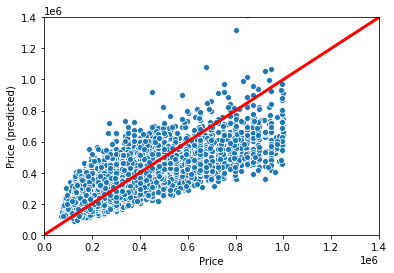

In [13]:
residual = house['price_p'] - house['price'] #Subtracting Y'-Y (Y' = predicted) gets us the residual
sns.scatterplot(x='price',y='price_p',data=df)
plt.xlim(0, 1400000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 1400000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

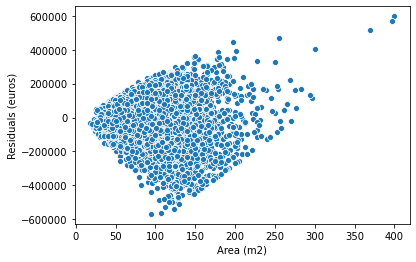

In [14]:
df['residual'] = df['price_p'] - df['price']
sns.scatterplot(x='area',y='residual',data=df)
plt.xlabel('Area (m2)')
plt.ylabel('Residuals (euros)')
plt.show()

In [15]:
r2_score(df['price'], df['price_p'])

0.5257421182315432

In [16]:
math.sqrt(mean_squared_error(df['price'], df['price_p'])) #this gives the model fit (R2) for the Y and predicted Y

118016.87861535022

Based on the R^2, We can predict 52.5% of the variation in the price based on area. Our typical prediction is off by 118,017 euros. As we can see in the Y-Y' plot and the residual plot, the errors increase with area. Low-priced houses are predicted too high and high-priced houses are predicted too low. The model gives us a rough indication of what a house is worth, but the model wouldn't be good enough for a real estate agent.